In [3]:
from pathlib import Path
import xarray
#import datatree 
import cartopy.crs as ccrs
import cartopy  
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd  
#import access_viirs
datadir = Path.home() / "Downloads" # Path.home() makes the code work for different users  

Read vpn03 files

In [5]:
#def read_open_vnp03(filename):     

filename03 = "VNP03MOD.A2020166.1342.002.2021125191832.nc"
# Open the file & make it a dataset
open_vnp03 = xarray.open_dataset(datadir / filename03, group = "geolocation_data",) 
list(open_vnp03) 

# Access the relavant variables 
height_ds = open_vnp03['height']  
lwm_ds = open_vnp03['land_water_mask']   
lat_ds = open_vnp03['latitude']   
lon_ds = open_vnp03['longitude']  
senazi_ds = open_vnp03['sensor_azimuth']  
senzen_ds = open_vnp03['sensor_zenith']   
solazi_ds = open_vnp03['solar_azimuth']   
solzen_ds = open_vnp03['solar_zenith']   

''' Scaling factors not needed automatically implented 
# Apply scaling factors/offsets 
height_scaled = height_ds * 1
lwm_scaled = lwm_ds
lat_scaled = lat_ds
lon_scaled = lon_ds
senazi_scaled = senazi_ds * 0.01
senzen_scaled = senzen_ds * 0.01
solazi_scaled = solazi_ds * 0.01
solzen_scaled = solzen_ds * 0.01 
'''

# Extra: Read the long_names
height_long = height_ds.attrs['long_name']
lwm_long = lwm_ds.attrs['long_name']
lat_long = lat_ds.attrs['long_name']
lon_long = lon_ds.attrs['long_name'] 
senazi_long = senazi_ds.attrs['long_name']
senzen_long = senzen_ds.attrs['long_name']
solazi_long = solazi_ds.attrs['long_name']
solzen_long = solzen_ds.attrs['long_name']   

# Divide the reflectances by the cosine of the solar zenith 
cos_solzen_deg = np.cos(solzen_ds) # degrees
cos_solzen = np.radians(cos_solzen_deg) # radians   
print(cos_solzen) # the 'units' does not change from 'degrees' but the values are changing



<xarray.DataArray 'solar_zenith' (number_of_lines: 3232, number_of_pixels: 3200)>
array([[-1.2151014e-02, -1.2025094e-02, -1.1898018e-02, ...,
        -1.1591095e-03, -9.8493602e-04, -9.8493602e-04],
       [-1.2025094e-02, -1.1898018e-02, -1.1769706e-02, ...,
        -8.1063085e-04, -8.1063085e-04, -8.1063085e-04],
       [-1.1898018e-02, -1.1769706e-02, -1.1640265e-02, ...,
        -6.3624466e-04, -4.6179490e-04, -4.6179490e-04],
       ...,
       [ 4.3399635e-04,  8.4966923e-05, -8.9535984e-05, ...,
         1.7418463e-02,  1.7418463e-02,  1.7418463e-02],
       [ 2.5949461e-04,  8.4966923e-05, -8.9535984e-05, ...,
         1.7406574e-02,  1.7406574e-02,  1.7392941e-02],
       [ 2.5949461e-04,  8.4966923e-05, -2.6406322e-04, ...,
         1.7392941e-02,  1.7377568e-02,  1.7377568e-02]], dtype=float32)
Dimensions without coordinates: number_of_lines, number_of_pixels
Attributes:
    long_name:  Solar zenith angle at pixel locations
    units:      degrees
    valid_min:  0
    vali

Make the maps for relavant variables of the vnp03 files

In [ ]:
# Land-Water Mask Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, lwm_ds) 
# Pass the longname as the title
ax.set_title(lwm_long)
ax.coastlines() 
# Replace integers with flag_meanings **NOT CURRENTLY WORKING
formatter = plt.FuncFormatter(lambda val, loc: lwm_ds.attrs['flag_meanings'])
# Colorbar and lables  
cb = plt.colorbar(pc, ticks=[0,1,2,3,4,5,6,7], shrink=0.5, format=formatter)  
plt.show()


In [ ]:
# Height Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, height_ds) 
# Pass the longname as the title
ax.set_title(height_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

In [ ]:
# Sensor_Azimuth Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, senazi_ds) 
# Pass the longname as the title
ax.set_title(senazi_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

In [ ]:
# Sensor_Zenith Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, senzen_ds) 
# Pass the longname as the title
ax.set_title(senzen_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

In [ ]:
# Solar_Azimuth Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, solazi_ds) 
# Pass the longname as the title
ax.set_title(solazi_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

In [ ]:
# Solar Zenith Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, solzen_ds) 
# Pass the longname as the title
ax.set_title(solzen_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

Read vnp02 files

In [6]:
#def read_vnp02(): 
filename = "VNP02MOD.A2020166.1342.002.2021127082551.nc"
# Open the dataset
open_vpn02 = xarray.open_dataset(datadir / filename, group = "observation_data", mask_and_scale=False) 
list(open_vpn02) 

# Access the relavant variables 
M03_ds = open_vpn02['M03']  # blue light
M04_ds = open_vpn02['M04']  # green light  
M05_ds = open_vpn02['M05']  # red light
M09_ds = open_vpn02['M09']  # wavelength that water absorbs light
M14_ds = open_vpn02['M14']  # thermal infared wave length
M14_BTL_ds = open_vpn02['M14_brightness_temperature_lut']   
M15_ds = open_vpn02['M15'] # thermal infared wave length   
M15_BTL_ds = open_vpn02['M15_brightness_temperature_lut'] 
M16_ds = open_vpn02['M16'] # thermal infared wave length  
M16_BTL_ds = open_vpn02['M16_brightness_temperature_lut']   

# Scale the relavent variables 
M03_scaled = M03_ds * M03_ds.attrs['scale_factor'] + M03_ds.attrs['add_offset'] 
M04_scaled = M04_ds * M04_ds.attrs['scale_factor'] + M04_ds.attrs['add_offset']  
M05_scaled = M05_ds * M05_ds.attrs['scale_factor'] + M05_ds.attrs['add_offset']  
M09_scaled = M09_ds * M09_ds.attrs['scale_factor'] + M09_ds.attrs['add_offset']

# Divide the reflectances by the cosine of the solar zenith 
cos_solzen = np.cos(solzen_ds) # degrees
cos_solzen = np.radians(cos_solzen) # radians  

# Divide the reflectances by the cosine of the solar zenith angle 
M03_scaled = M03_scaled / cos_solzen 
M04_scaled = M04_scaled / cos_solzen 
M05_scaled = M05_scaled / cos_solzen 
M09_scaled = M09_scaled / cos_solzen 

# Convert to brightness temperature in K 
M14_scaled = open_vpn02['M14_brightness_temperature_lut'][open_vpn02['M14']] 
M15_scaled = open_vpn02['M15_brightness_temperature_lut'][open_vpn02['M15']] 
M16_scaled = open_vpn02['M16_brightness_temperature_lut'][open_vpn02['M16']] 

# Check for the fill value  
for value in open_vpn02: 
    if value == 65535: # this is from the "_FillValue" variable in the dataset
        value = -999

Map vpn_02

In [ ]:
# M03 Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M03_ds) 
# Add coastlines
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

In [ ]:
# M04 Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M04_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

In [ ]:
# M05 Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M05_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

In [ ]:
# M09 Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M09_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet, RdBu
plt.show()

In [ ]:
# M14 Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M14_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

In [ ]:
# M15 Map  
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M15_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

In [ ]:
# M16 Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, M16_ds) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

read CLDMSK

In [15]:
# def read_CLDMSK
CLD_file = "CLDMSK_L2_VIIRS_SNPP.A2020166.1342.001.2020167010238.nc"
# Open the file & make it a dataset
open_CLD = xarray.open_dataset(datadir / CLD_file, group = "geophysical_data") 

# Open the relavent variables
CLDMSK_int = open_CLD['Integer_Cloud_Mask']  

# 1.) Values of 0 for “cloudy” or “probably cloudy” pixels and 1 for “probably clear” or “confidently clear” pixels  
# Chandge to 1 means cloud
# Create new variable
simple_CLDMSK = CLDMSK_int.copy()
# Confindently cloudy
simple_CLDMSK = xarray.where(CLDMSK_int == 0, 1, simple_CLDMSK)
# Confidently clear
simple_CLDMSK = xarray.where((CLDMSK_int == 2) | (CLDMSK_int == 3), 0, simple_CLDMSK)

# 2.) Value of 1 where a pixel in cloud_mask_simple is cloudy, OR when it is next to a pixel in cloud_mask_simple that is cloudy 
# Create new array with only the variables
CLDMSK_dialated = simple_CLDMSK.copy()  
# Create a 2-D array
make_2D_window = {"number_of_lines": 3, "number_of_pixels": 3}
# Pass the window sizes to .rolling() 
CLDMSK_dialated = CLDMSK_dialated.rolling(make_2D_window, center = True).sum()      
# if num > 0 replace w/ 1   
CLDMSK_dialated = xarray.where(CLDMSK_dialated > 0, 1, CLDMSK_dialated) 


#3.) Value of 0 where cloud_mask dilated is 0 and/or land_water_mask indicates a land pixel 
# (“land”, “coastline”, “ephemeral”, or “continental” classifications), and a value of 1 otherwise 
# Make new variable
lwm_dupe = lwm_ds.copy()  


# Land_water_mask indicates a land pixel (“land”, “coastline”, “ephemeral”, or “continental” classifications) = 0 
lwm_dupe = xarray.where(lwm_ds == 0, 1, lwm_dupe) # Shallow_Ocean
lwm_dupe = xarray.where(lwm_ds == 1, 0, lwm_dupe) # Land   
lwm_dupe = xarray.where(lwm_ds == 2, 0, lwm_dupe) # Coastline  
lwm_dupe = xarray.where(lwm_ds == 3, 1, lwm_dupe) # Shallow_Inland
lwm_dupe = xarray.where(lwm_ds == 4, 0, lwm_dupe) # Ephemeral 
lwm_dupe = xarray.where(lwm_ds == 5, 1, lwm_dupe) # Deep Inland
lwm_dupe = xarray.where(lwm_ds == 6, 0, lwm_dupe) # Continental   
lwm_dupe = xarray.where(lwm_ds == 7, 1, lwm_dupe) # Deep_Ocean

# Value of 0 where cloud_mask dilated is 0 & land_water_mask indicates a land pixel  
CLD_free_ocean = xarray.zeros_like(CLDMSK_dialated)
CLD_free_ocean = xarray.where((CLDMSK_dialated == 1) & (lwm_dupe == 1), 1, CLD_free_ocean)
CLD_free_ocean

<xarray.DataArray (number_of_lines: 3232, number_of_pixels: 3200)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Dimensions without coordinates: number_of_lines, number_of_pixels

Map Cloud Mask Files

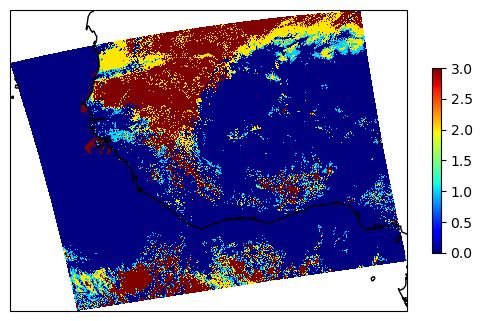

In [33]:
# Integer Cloud Mask Map 
ax = plt.axes(projection = ccrs.PlateCarree()) 
pc = ax.pcolormesh(lon_ds, lat_ds, CLDMSK_int) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

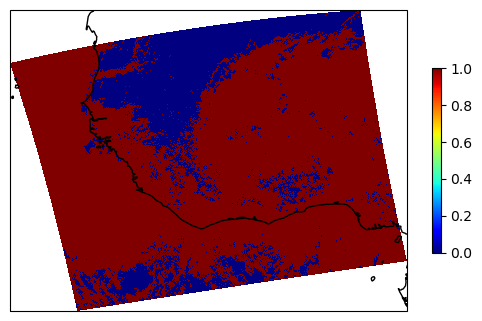

In [12]:
# Simple Cloud Mask Map  
ax = plt.axes(projection = ccrs.PlateCarree()) 
pc = ax.pcolormesh(lon_ds, lat_ds, simple_CLDMSK) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

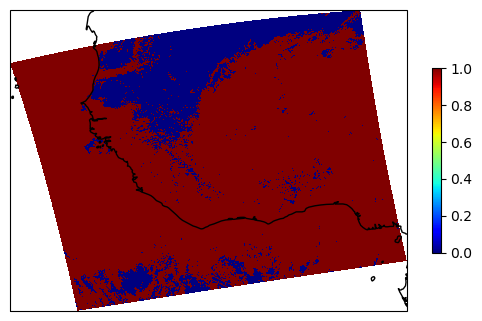

In [13]:
# Dilated Cloud Mask Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, CLDMSK_dialated) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('jet') # colors: viridis, plasma, cubehelix, jet
plt.show()

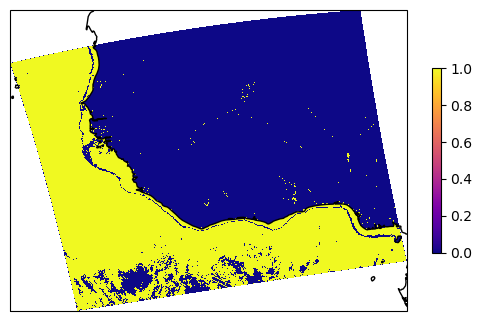

In [16]:
# Cloud Free Ocean Map 
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, CLD_free_ocean) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('plasma') # colors: viridis, plasma, cubehelix, jet
plt.show()

Advanced: make a brightness temperature difference map from both the granules

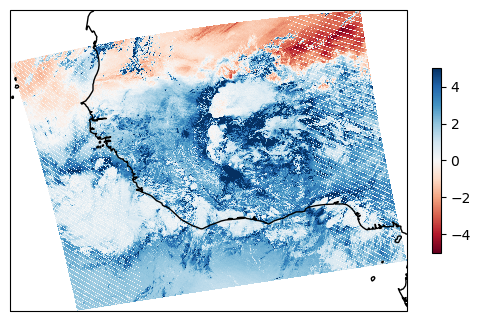

In [37]:
# Calculate the BTD for M15-M16
BTD_15_16 = M15_scaled-M16_scaled

# Map it
ax = plt.axes(projection = ccrs.PlateCarree()) 
pc = ax.pcolormesh(lon_ds, lat_ds, BTD_15_16) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('RdBu') # colors: viridis, plasma, cubehelix, jet
# Set color limits
pc.set_clim(-5, 5)
plt.show()

Advanced: make a true-colour red-green-blue composite from the daytime granule

In [ ]:
#  Stack M03(blue), M04(green), and M05(red) 
M543_stacked = np.dstack((M05_scaled, M04_scaled, M03_scaled)) 

# Map it
ax = plt.axes(projection = ccrs.PlateCarree()) 
pc = ax.pcolormesh(lon_ds, lat_ds, M543_stacked) 
# Pass the longname as the title
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5) 
pc.set_cmap('rgb') # colors: viridis, plasma, cubehelix, jet
# Set color limits
pc.set_clim(-5, 5)
plt.show()